In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Task 1: Read an image and convert it to grayscale
img = cv2.cvtColor(cv2.imread('F:\Task 2 image\wallpaperflare.com_wallpaper (2).jpg'), cv2.COLOR_BGR2GRAY)

In [4]:
# Task 2: Create 6 Noisy Images
# Gaussian Noise
gaussian_noises = [10, 30, 50]  # Intensities for Gaussian noise
gaussian_noisy_images = [img + np.random.normal(0, noise, img.shape) for noise in gaussian_noises]

# Salt and Pepper Noise
salt_pepper_probabilities = [0.02, 0.05, 0.1]  # Probabilities for salt & pepper noise
salt_pepper_noisy_images = [np.copy(img) for _ in salt_pepper_probabilities]

for i, prob in enumerate(salt_pepper_probabilities):
    salt_pepper_noisy_images[i][np.random.rand(*img.shape) < prob/2] = 0
    salt_pepper_noisy_images[i][np.random.rand(*img.shape) > (1 - prob/2)] = 255

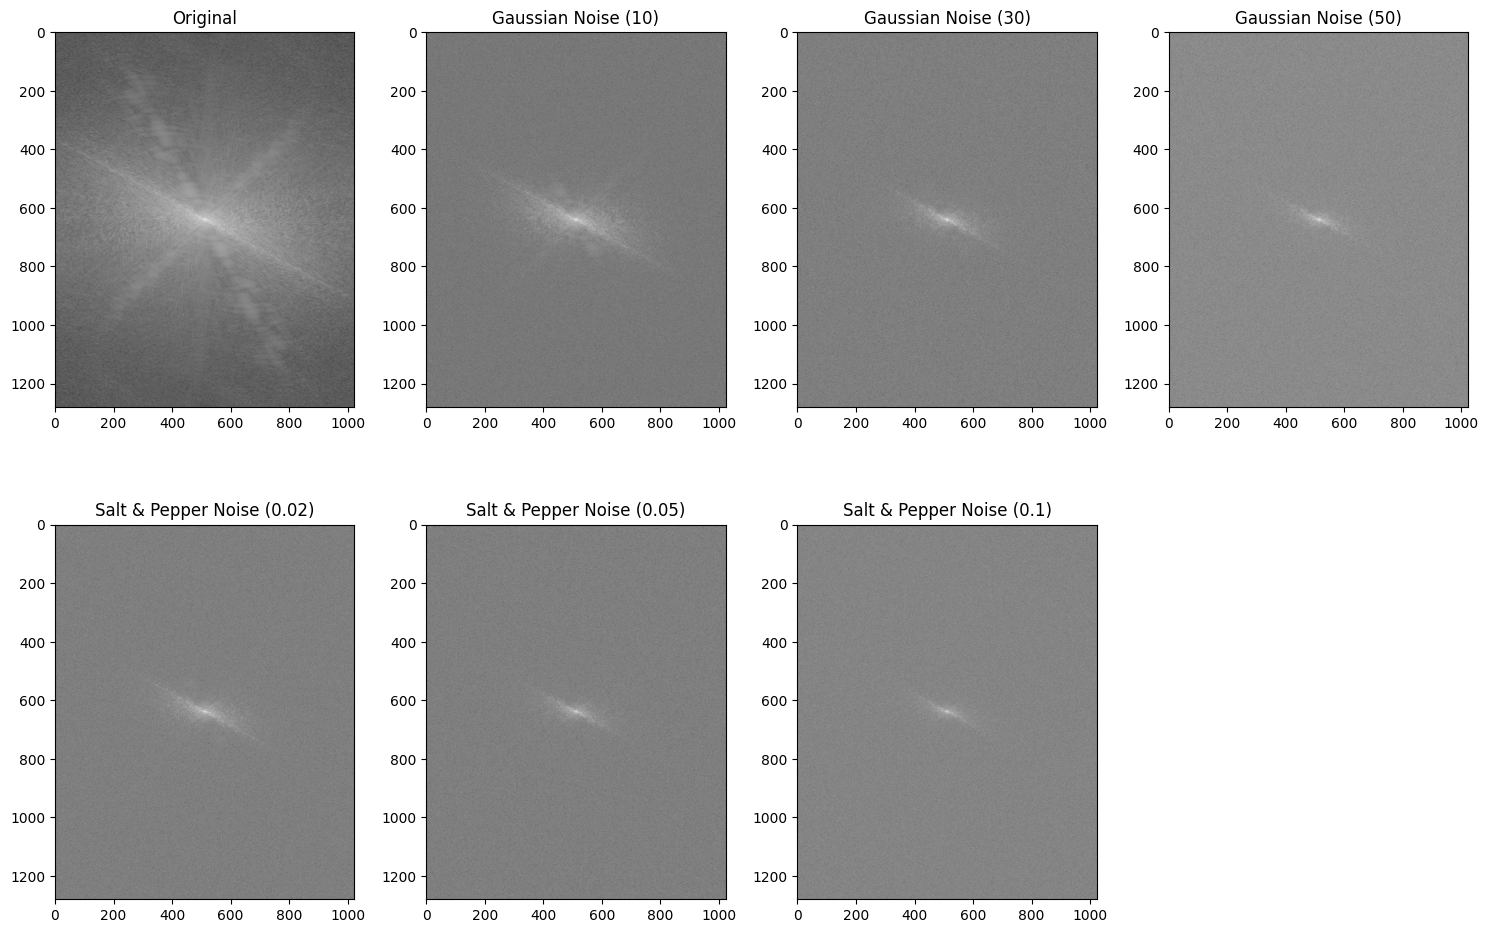

In [5]:
# Task 3: Compare Frequency Domains
plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1), plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(img)))), cmap='gray'), plt.title('Original')
for i in range(3):
    plt.subplot(2, 4, i + 2), plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(gaussian_noisy_images[i])))), cmap='gray'), \
    plt.title(f'Gaussian Noise ({gaussian_noises[i]})')
for i in range(3):
    plt.subplot(2, 4, i + 5), plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(salt_pepper_noisy_images[i])))), cmap='gray'), \
    plt.title(f'Salt & Pepper Noise ({salt_pepper_probabilities[i]})')

plt.tight_layout()

In [6]:
#Task 4: Apply High Pass Filters
def high_pass_filter(img, cutoff_freq):
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    
    rows, cols = img.shape
    crow, ccol = rows // 2 , cols // 2

    # Create a mask with a high-pass filter
    mask = np.ones((rows, cols), np.uint8)
    r = cutoff_freq
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
    mask[mask_area] = 0

    # Apply the mask and inverse transform
    dft_shift_high_pass = dft_shift * mask
    img_high_pass = np.abs(np.fft.ifft2(np.fft.ifftshift(dft_shift_high_pass)))

    return img_high_pass

cutoff_freq = 30  # You can adjust this parameter
filtered_images = [high_pass_filter(image, cutoff_freq) for image in [img] + gaussian_noisy_images + salt_pepper_noisy_images]


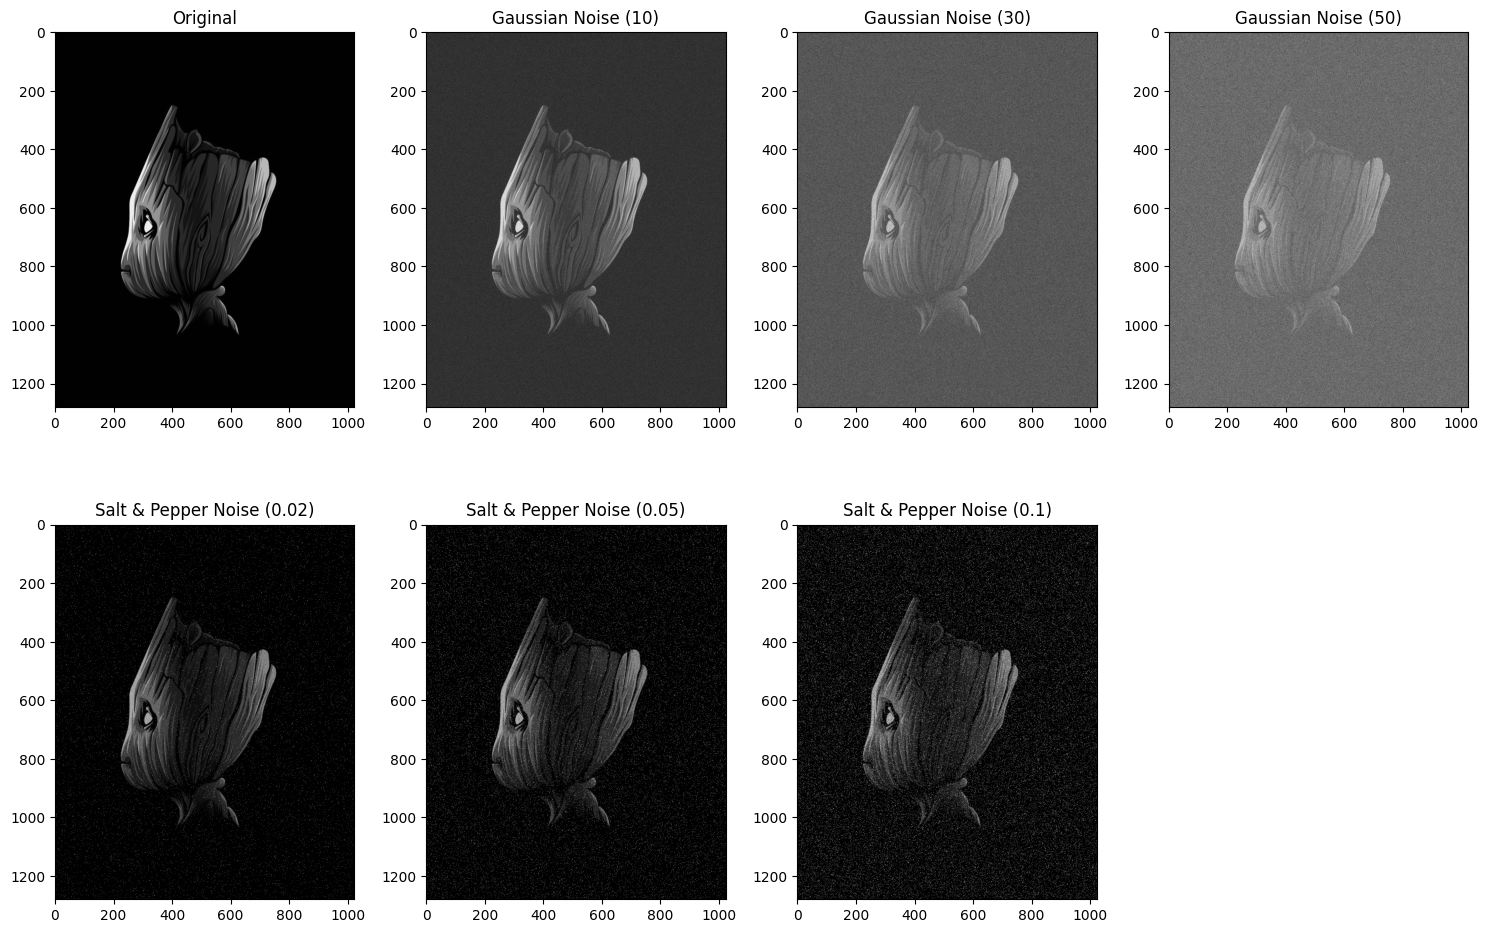

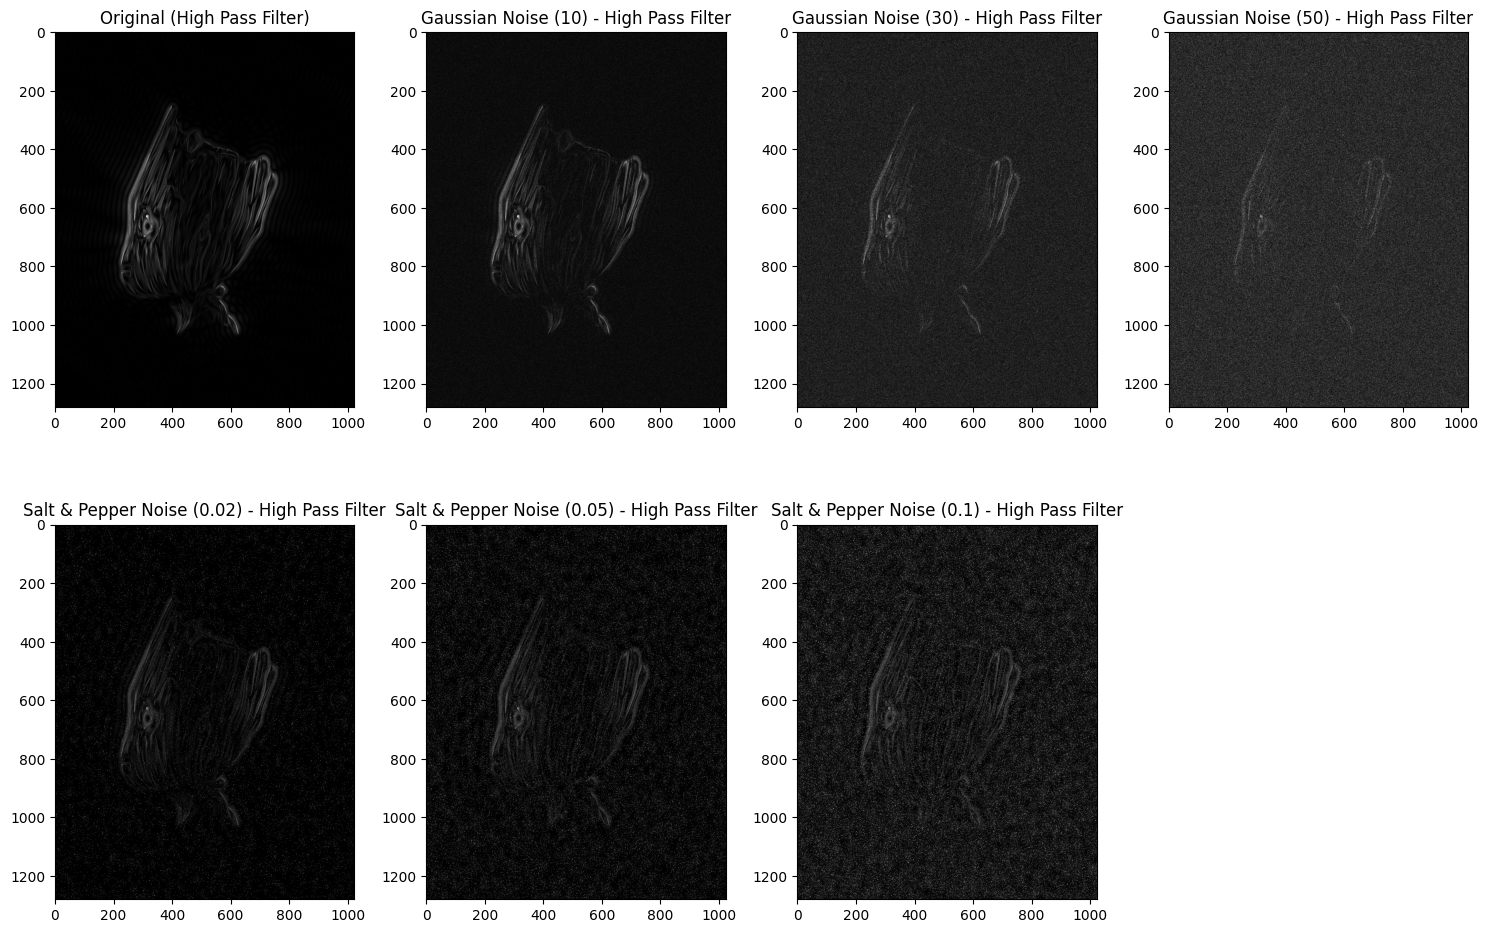

In [7]:
# Display Results
plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
for i in range(3):
    plt.subplot(2, 4, i + 2), plt.imshow(gaussian_noisy_images[i], cmap='gray'), \
    plt.title(f'Gaussian Noise ({gaussian_noises[i]})')
for i in range(3):
    plt.subplot(2, 4, i + 5), plt.imshow(salt_pepper_noisy_images[i], cmap='gray'), \
    plt.title(f'Salt & Pepper Noise ({salt_pepper_probabilities[i]})')

plt.tight_layout()

plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1), plt.imshow(filtered_images[0], cmap='gray'), plt.title('Original (High Pass Filter)')
for i in range(3):
    plt.subplot(2, 4, i + 2), plt.imshow(filtered_images[i + 1], cmap='gray'), \
    plt.title(f'Gaussian Noise ({gaussian_noises[i]}) - High Pass Filter')
for i in range(3):
    plt.subplot(2, 4, i + 5), plt.imshow(filtered_images[i + 4], cmap='gray'), \
    plt.title(f'Salt & Pepper Noise ({salt_pepper_probabilities[i]}) - High Pass Filter')

plt.tight_layout()

plt.show()